In [2]:
import os
import numpy as np
import time
import pygame
import pygame
from pygame import camera
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Conv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from io import BytesIO

pygame 2.0.1 (SDL 2.0.14, Python 3.8.6)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [9]:
model= keras.models.load_model('./models/')

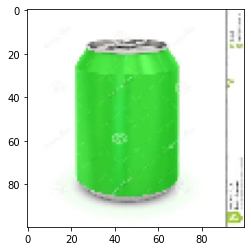

In [28]:
img=keras.preprocessing.image.load_img('./images/greenalu.jpg', grayscale=False, color_mode="rgb", target_size=(100,100), interpolation="nearest")
plt.imshow(img)
input_arr = keras.preprocessing.image.img_to_array(img)
input_arr = np.array([input_arr])

In [8]:
size=(1280,720)
pygame.init()
pygame.camera.init()
display = pygame.display.set_mode(size, 0)
camera = pygame.camera.Camera(camera.list_cameras()[0], size)
camera.start()
screen = pygame.surface.Surface(size, 0, display)
capture = True
while capture:
    screen = camera.get_image(screen)
    display.blit(screen, (0,0))
    pygame.display.flip()
    for event in pygame.event.get():
        if event.type == QUIT:
            capture = False
        elif event.type == KEYDOWN and event.key == K_s:
            pygame.image.save(screen, FILENAME)
camera.stop()
pygame.quit()

Error: Cannot set capture resolution.

In [16]:
size=(640,480)
pygame.init()
pygame.camera.init()
display = pygame.display.set_mode(size, 0)
camera = pygame.camera.Camera(pygame.camera.list_cameras()[0], size)
camera.start()
screen = pygame.surface.Surface(size, 0, display)
screen = camera.get_image(screen)
pygame.image.save(screen, 'master.jpg')
camera.stop()
pygame.quit()

In [27]:
result=model.predict(input_arr)
m= 0
out= 0
for i in result:
    for g in range(len(i)):
        if i[g]>m:
            m=i[g]
            out=g
if out==0:
    print('AluCan')
elif out==1:
    print('Glass')
elif out==2:
    print('HDPEM')
elif out==3:
    print('PET')
else:
    print('Error')

Glass
